# Bayesian inference tutorial: a hello world example

To illustrate what is *Bayesian inference* (or more generally *statistical inference*), we will use an example.

We are interested in understanding the height of Python programmers. One reason could be that we are helping organize a PyCon conference, and we want to know the proportion of the sizes of the T-shirts we are going to give, without having to ask each attendee.

The exact number of Python programmers in the world is unknown, but we can think there are few millions of us.

A first approach would be to ask each of us for our height, and we would be able to answer the question. But this does not seem feasible.

So, we are going to use *statistics* to find a solution. And there are two things we need, to start with:
* A model that represents the height of Python programmers
* A data sample with the height of few Python programmers.

In general, statistical models are defined by some parameters. For example, a *normal distribution* is defined by its *mean* and its *standard deviation*. A *beta distribution* is defined by its *alpha* and *beta* parameters. Or an *exponential distribution* is defined by its *lambda*.

**The goal of *statistical inference* is, given a statistical model, find the parameters of our population of interest, based on the observed data sampled from it.**

If we decide to model the height of Python programmers with a *normal distribution*, our *inference* problem is to find the *mean* and the *standard deviation* of the height of all Python programmers. And to find these parameters, we will use a sample of Python programmers with known height.

It's important to make the distinction between the data we observe, which is a sample, and all the population. Computing the *mean* and the *standard deviation* of the observed sample is straight-forward. But *statistical inference* is about inferring the *mean* and the *standard deviation* of the whole population (all Python programmers in the world), which cannot be observed directly.

Something that we need to consider, is that the sample used for the inference should be unbiased. For example, in the Netherlands people is usually taller than in most parts of the world. If we collect data of Dutch Python programmers, we will observe higher heights than if we collect data of random Python programmers around the globe. And, if we use the data collected in the Netherlands, we will infer the parameters of Dutch Python programmers. But the parameters will be biased in representing Python programmers of the whole world.

In [1]:
sample_of_python_programmers_height = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

Summarizing:
1. We want to know the distribution of the height of Python programmers (around 3 Million people)
2. We don't have the height of all them, and it isn't feasible to obtain
3. We do have the height of a sample of them (10 Python programmers)
4. This sample is unbiased, and should represent the distribution of all Python programmers
5. We decide to use the *normal distribution*, so we can represent the 3 Million heights in just two parameters (the mean and the standard deviation)
6. The process of obtaining these parameters of the distribution of all Python programmer heights (3 Million of programmers) from a sample of them (10 Python programmers) is named *inference*
7. Once we have the distribution of the height of Python programmers, we can answer questions like, how many S, M, L, XL t-shirts should I get for my conference with 1,000 Python programmer attendees?

### Choosing a model

As said, the first thing once we've got some data is to choose the model that was more likely to generate the data. In this case we decide that the height of Python developers can be modelled with a *normal distribution*.

One important thing to remember is that **all models are wrong, but some of them are useful**. This means that the distribution of the height of all Python programmers won't follow an exact *normal distribution*. But we expect that the distribution is similar enough, and that our model can be useful, even if it is not 100% accurate.

A normal distribution has two parameters, the mean $\mu$ and the standard deviation $\sigma$ (or the variance $\sigma^2$ which is equivalent, as it is just the square of the standard deviation).

Deciding which model to use can be obvious in few cases, but it will be complex in many others. Some of the easy cases are:
* The *Normal distribution* when modelling natural phenomena like human heights.
* The *Beta distribution* when modelling probability distributions.
* The *Poisson distribution* when modelling the frequency of events occurring.

In many cases we will use a combination of different distributions to explain how our data was generated.

Each of these distribution has parameters: $\alpha$ and $\beta$ for the *beta distribution*, $\lambda$ for the *Poisson*, lower and upper bounds for the *uniform distribution*, or $\mu$ and $\sigma$ for the *normal distribution* of our example.

### Parts of the problem

To recap, the different parts of the problem, for our example, are:
* A sample of **data** $x$ from the population of interest
    - Example: Height of a sample of Python programmers, 183 cms, 168 cms, 177 cms, etc.


* A **statistical model** that generates data in a similar way as the population of interest.
    - Example: The *normal distribution*.


* The **parameters** of the model
    - Example: The *mean* $\mu$ and the *standard deviation* $\sigma$ of a *normal distribution*.

### Evaluating a set of parameters

Before going into the process of finding the best parameters, we will start by choosing some arbitrary ones, and evaluate how good they are. For example, we can choose the values $\mu=175$ and $\sigma=5$, which could be a first reasonable approximation.

To evaluate the goodness of a set of parameter values, we use the Bayes formula (hence the *Bayesian inference* name):

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

Given the model (a *normal distribution* in this case), $P(\theta|x)$ is the probability that the parameters $\theta$ (which are $\mu$ and $\sigma$ in this case) after observing the data $x$.

The higher the probability of the parameter values given the data, the more likely they will be the "real" parameters of the population distribution.

This means that we can transform our problem of finding the parameters of the population distribution, to finding the values of the parameters that maximize the value $P(\theta|x)$.

### Bayes formula

Let us take a closer look at Bayes formula, as it is the quantity we are interested in maximizing:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

We already mentioned that $P(\theta|x)$ is the probability of the parameter values we are evaluating, after observing the data $x$. And assuming our data is generated by our choosen model, the *normal distribution* in the example.

In Bayesian terminology, $P(\theta|x)$ is known as the **posterior**, and is a function of three other values:

* $P(x|\theta)$: the **likelihood**, which is the probability of obtaining the data $x$ from the model with the parameters $\sigma$ we are evaluating.

* $P(\theta)$: the **prior**, which is our knowledge about the parameters before seeing any data.

* $P(x)$: the **evidence**, which is the probability of the data, not given any specific set of parameters $\sigma$, but given the model we choose.

These definitions can sound a bit complex, so we can see each of them in more detail, and with examples.

### Likelihood

The likelihood is the probability of obtaining the data $x$ from the choosen model (e.g. the *normal distribution*) and for a specific set of parameters $\theta$ (e.g. $\mu=175$ and $\sigma=5$).

It is often represented as $\mathcal{L}(\theta|x)$ (note that the order of $\theta$ and $x$ is reversed to when the probability notation is used).

In the case of a normal distribution, the formula to compute the probability given $x$ (its probability density function) is:

$$\mathcal{L}(\theta|x) = P(x|\theta) = P(x| \mu, \sigma)  = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

If we plot it, we obtain the famous normal bell curve (we use $\mu=175$  and $\sigma=5$ in the plot):

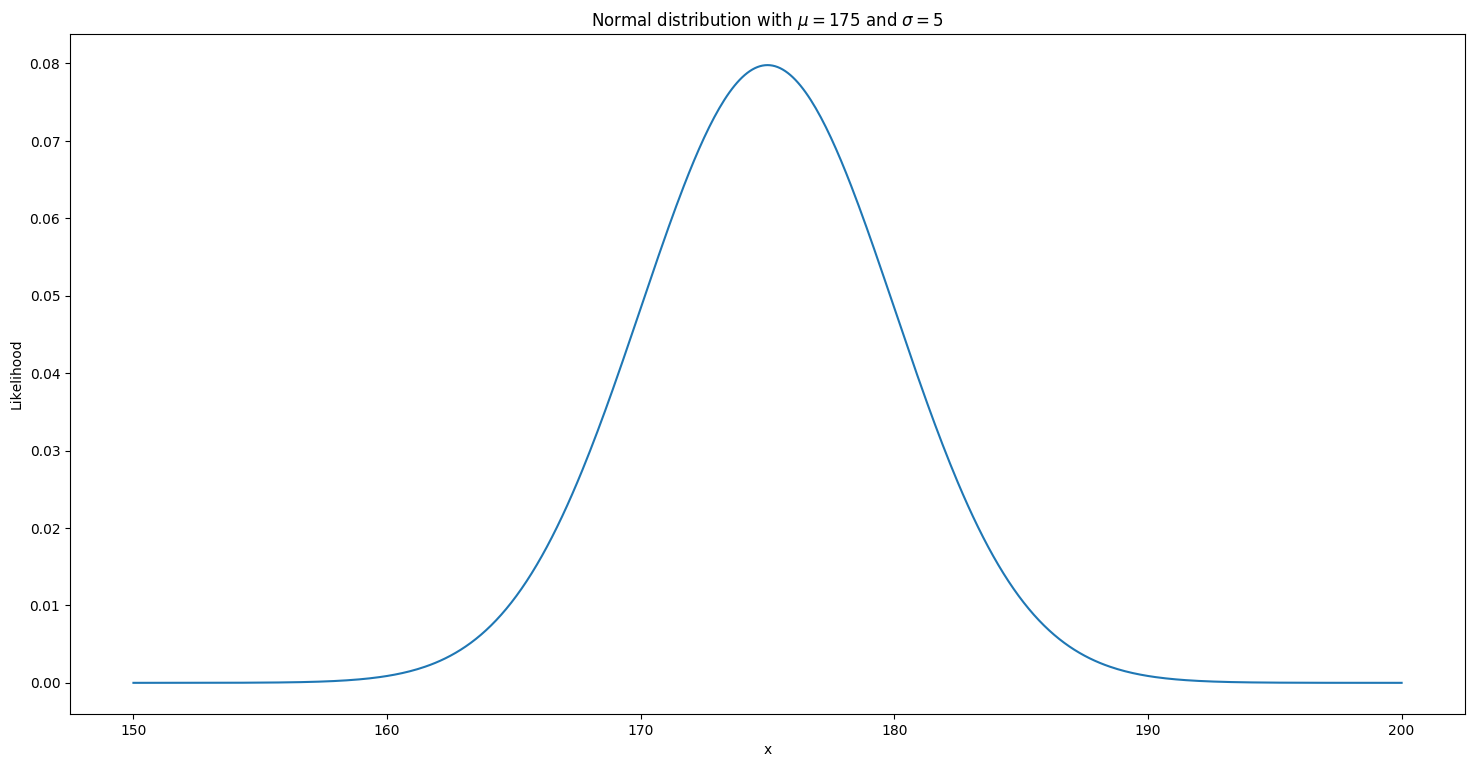

In [2]:
import numpy
import scipy.stats
from matplotlib import pyplot

mu = 175.
sigma = 5.

x = numpy.linspace(150., 200., 501)
likelihood = scipy.stats.norm.pdf(x, mu, sigma)

pyplot.plot(x, likelihood)
pyplot.xlabel('x')
pyplot.ylabel('Likelihood')
pyplot.title('Normal distribution with $\mu=175$ and $\sigma=5$');

Following the example, we wanted to score how good are the parameters $\mu=175$ and $\sigma=5$ for our data. So far we choosen these parameters arbitrarily, but we'll choose them in a smarter way later on.

If we take the probability density function (p.d.f.) of the *normal distribution* and we compute for the first data point of $x$ 183, we have:

$$P(x | \mu, \sigma)  = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

where $\mu=175$, $\sigma=5$ and $x=183$, so:

$$P(x=183 | \mu=175, \sigma=5)  = \frac{1}{\sqrt{2 \cdot \pi \cdot 5^2}} \cdot e^{-\frac{(183 - 175)^2}{2 \cdot 5^2}}$$

If we do the math:

In [3]:
import math

likelihood = 1. / math.sqrt(2 * math.pi * (5 **2)) * math.exp(-((183 - 175) ** 2) / (2 * (5 ** 2)))
likelihood

0.022184166935891113

If we check this value in the plot, we can see that it is the probability of the value $183$ given a *normal distribution* with $\mu=175$ and $\sigma=5$:

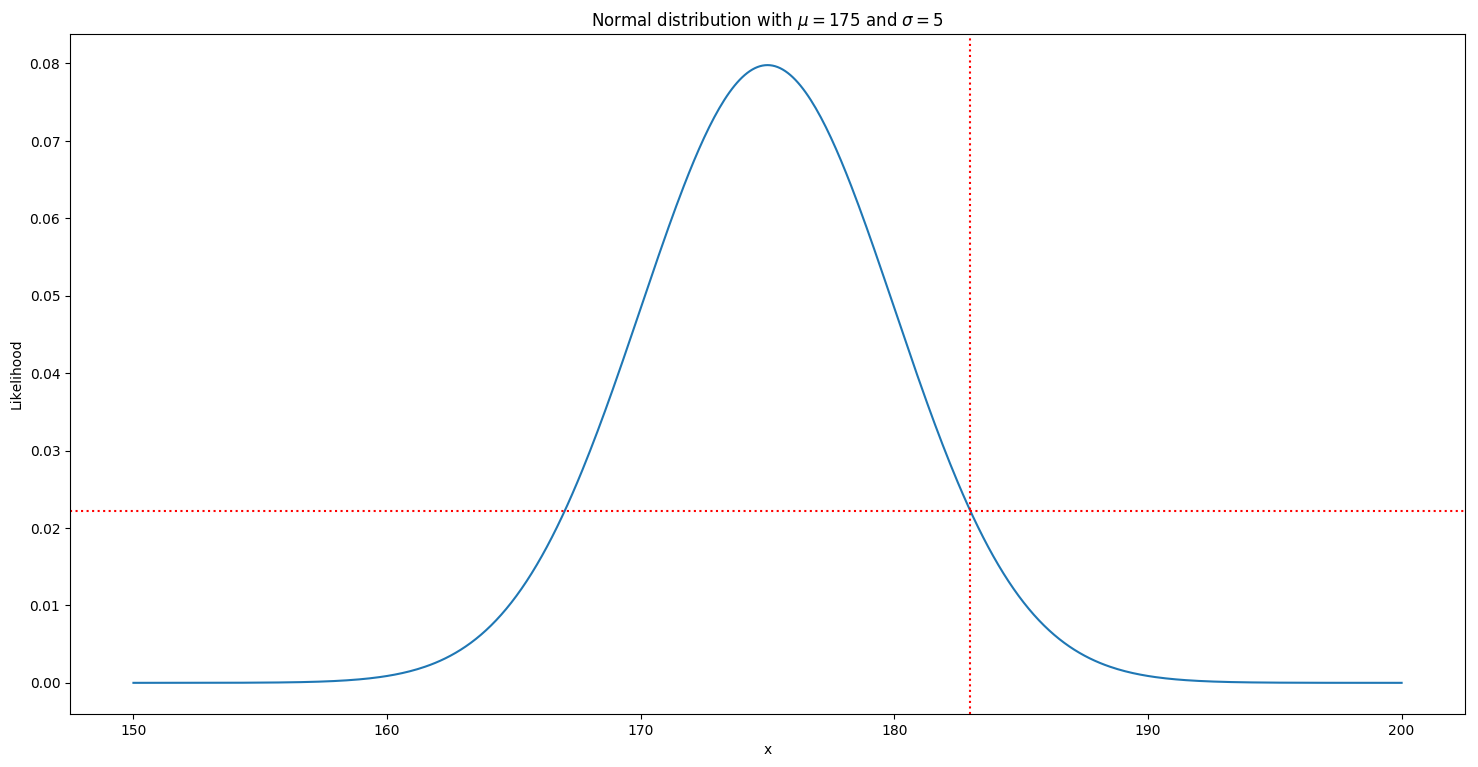

In [4]:
import math
import numpy
import scipy.stats
from matplotlib import pyplot

likelihood_183 = 1. / math.sqrt(2 * math.pi * (5 **2)) * math.exp(-((183 - 175) ** 2) / (2 * (5 ** 2)))

mu = 175.
sigma = 5.

x = numpy.linspace(150., 200., 501)
likelihood = scipy.stats.norm.pdf(x, mu, sigma)

pyplot.plot(x, likelihood)
pyplot.xlabel('x')
pyplot.ylabel('Likelihood')
pyplot.title('Normal distribution with $\mu=175$ and $\sigma=5$')
pyplot.axvline(x=183, color='red', linestyle=':')
pyplot.axhline(likelihood_183, color='red', linestyle=':');

With *scipy* we can easily compute the likelihood of all values in our data:

In [5]:
import scipy.stats

mu = 175.
sigma = 5.

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x, mu, sigma)

array([ 0.02218417,  0.02994549,  0.07365403,  0.04839414,  0.07978846,
        0.07365403,  0.06664492,  0.01579003,  0.07820854,  0.06664492])

### Prior

The prior is our knowledge of the parameters before we observe the data. It's probably the most subjective part of Bayesian inference, and different approaches can be used.

We can use informed priors, and try to give the model as much information as possible. Or use uninformed priors, and let the process find the parameters using mainly the data.

In our case, we can start thinking on which are the possible values for a normal distribution.

For the *mean*, the range is between $-\infty$ and $\infty$. But we can of course do better than this.

We're interested on the mean of Python developers height. And it's easy to see that the minimum possible height for anything is $0$. And for the maximum, we can start by considering the maximum known human height. This is 272 cms, the maximum measured height of Robert Pershing Wadlow, born in 1918. We can be very confident that the mean of the height of Python developers is in the range $0$ to $272$. So, a first option for an *uninformed* prior could be all the values in this range with equal probability.

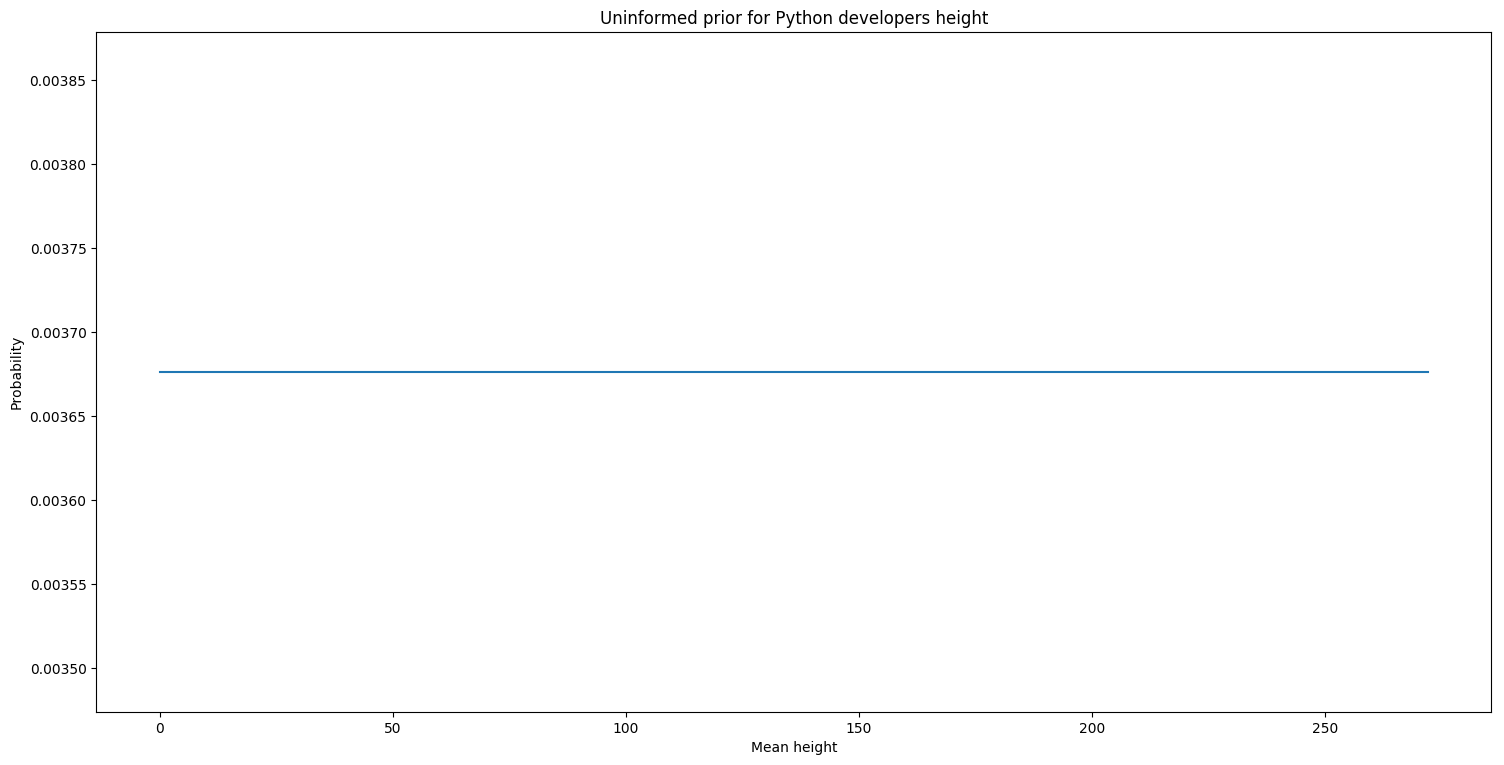

In [6]:
import numpy
import scipy.stats
from matplotlib import pyplot

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.uniform.pdf(mean_height, 0, 272)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Uninformed prior for Python developers height');

This could work, but we can do better. Just having 10 data points, the amount of information that we can *learn* from them is quite limited. And we may end up using these 10 data points to discover something we already know. That the probability of the mean height being 0 is nil, as it is the probability of the maximum ever observed height. And that the probability of a value like 175 cms is much higher than the probability of a value like 120 cms.

If we know all this before observing any data, why not use it? This is exactly what a prior is. The tricky part is defining the exact prior.

In this case, we don't know the mean of the height of Python developers, but we can check the mean of the height of the world population, which is arond 165. This doesn't need to be the value we're looking for. It's known that there are more male than female Python programmers, And male height is higher, so the value we're looking for will probably be higher. Also, height changes from country to country, and Python programmers are not equally distributed around the world. But we will use our data to try to find the value that consider all these biases. The prior is just a starting point that will help find the value faster.

So, let's use the mean of the world population as the mean of our prior, and we'll take the standard deviation of the world population, 7 cms, and we'll use the double of it. Multiplying it by 2 is arbitrary, but we'll make our prior a bit less *informed*. As mentioned before, choosing a prior is quite subjective.

Note that it's not necessary to use a normal distribution for the prior. We were considering a uniform distribution before. But in this case it can make sense, as we're more sure than the mean we're looking for will be close to the mean of the human population, and that having an extreme mean is less likely.

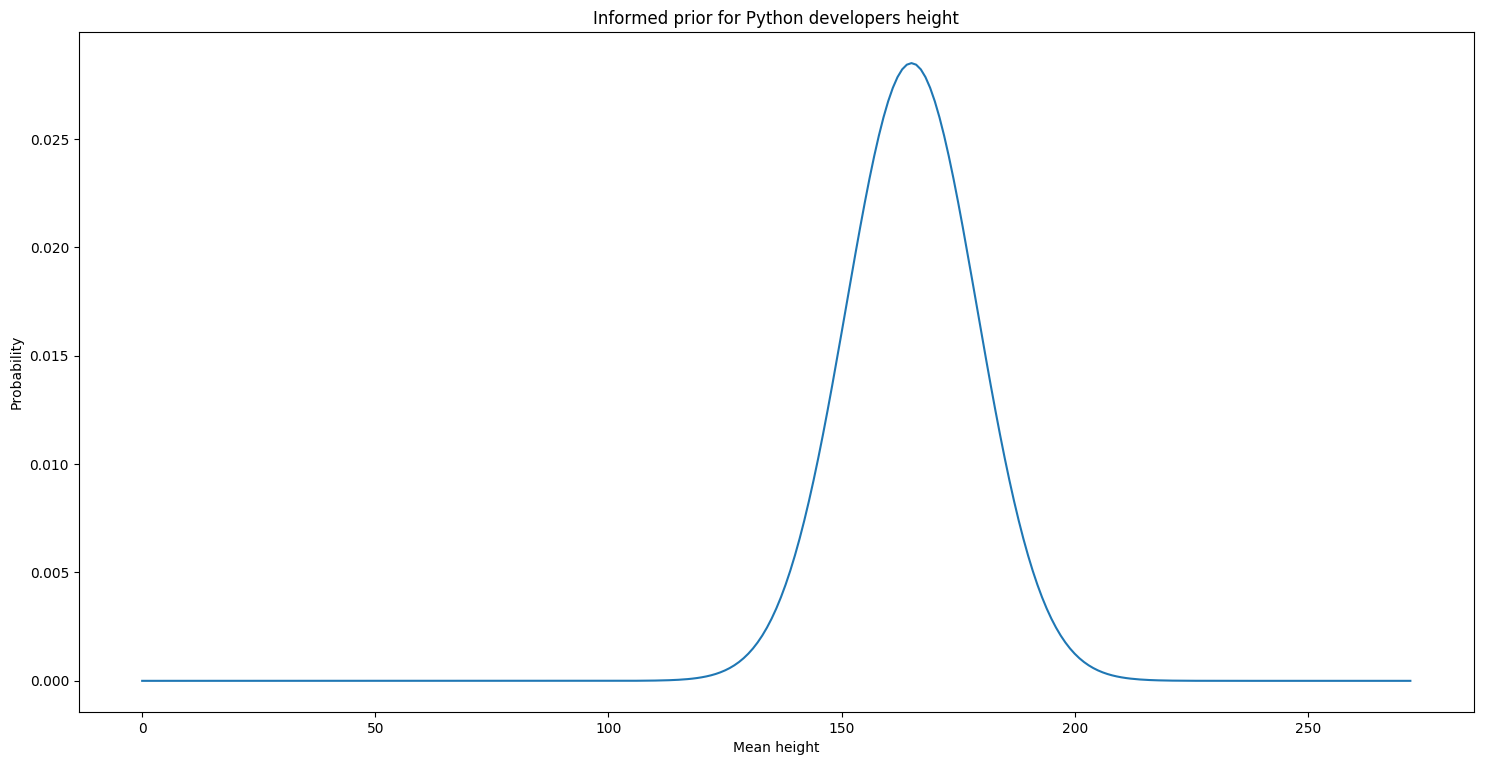

In [7]:
import numpy
import scipy.stats
from matplotlib import pyplot

world_height_mean = 165
world_height_standard_deviation = 7

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.norm.pdf(mean_height, world_height_mean, world_height_standard_deviation * 2)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for Python developers height');

If we go back to our example, we can easily compute the prior for the first sample in $x$.

In [8]:
import scipy.stats

world_height_mean = 165
world_height_standard_deviation = 7

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

0.01246879102010001

### Evidence

The *evidence* is the probability of the data $P(x)$. The whole Bayesian formula assumes a certain model (in our case we assume that the distribution of the height of Python programmers was following a *normal distribution*). So, the *evidence* can be seen as the probability of the model coming from a *normal distribution* no matter the parameters (or any distribution or combination of them we're using for the problem).

We can consider the probability of the data coming from a *normal distribution* like the sum of the probabilities of the data coming from each of the possible parameters.

If we consider the height a *discrete* variable (it is not, but this simplifies the explanation), and the range of its values $0$ to $272$. And we just consider the *mean* and ignore the *standard deviation* (again, a simplification). Then, the evidence can be expressed as:

$$P(x) = \sum_{i=0}^{272} P(x|\mu_i)$$

Each of the probabilities $P(x|\mu_i)$ is a *likelihood*, and we've already seen how to compute them.

In practice, we need to consider the simplifications we made. We first need to consider the *standard deviation* (we can represent $\mu$ and $\sigma$ as simply $\theta$). Then we need to consider that both are *continuous* and not *discrete*. Being continuous means that instead of a sum, we have an integral. And finally, we will consider the interval $-\infty$ yo $\infty$ instead of $0$ to $272$.

The actual equation considering all these things is:

$$P(x) = \int_{-\infty}^{\infty} P(x|\theta) \cdot d\theta$$

Mathematically, this equation is more complex than the previous, but conceptually they are the same.

### Posterior

The posterior is the probability of the parameters given the data $P(\theta|x)$, and it's our quantity of interest, as it represets how good the tested parameters are.

As we've seen, the posterior is the result of the product of the *likelihood* and the *prior*, divided by the *evidence*:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

We've seen that computing the *likelihood* and the *prior* is quite straight-forward. But the *evidence* can be trickier, or simply too complex. The good news is that even if we can't compute the denominator, as it's the same for all parameters, we can still find the best without it.

For example, if we are considering $\mu=175$ and $\sigma=5$, and we want to know if it's better or worse than $\mu=168$ and $\sigma=7$, we don't need to know the *evidence*. The evidence does not depend on the parameters, so it'll be the same in both cases. So, even if we don't know the value, we know that the set of parameters that maximizes the nominator, will be the best.

We can then consider that the *posterior* is proportional to the the nominator of the Bayes formula. This can be expressed like this:

$$P(\theta|x) \propto P(x|\theta) \cdot P(\theta)$$

Back to our example, we can compute the *posterior* for first value in our sample, 183 (we'll keep calling it the posterior, even if what we mean is the nominator of the posterior):

In [9]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

likelihoods = scipy.stats.norm.pdf(x, mu, sigma)

posterior = prior * likelihoods[0]

The next step is to compute the posterior for every data point in $x$. And doing it, we'll see the beauty of the *Bayesian method*.

The idea of the *Bayesian method* is that we start with our *prior* knowledge, which is what we know before seeing any data. And then we update it with the *likelihood*, which is our knowledge of the parameters given the data.

The interesting part is that after having our *prior* knowledge, and updating it with what we know from the first data point, what we have is the *prior* knowledge of the other data points.

So, we start with our *prior*, we multiply it by the *likelihood* of the first data point, and we've got a *posterior*. This will be our *posterior* after having seen the first data point, but at the same time it'll be our *prior* before seeing the rest of the samples.

This makes Bayesian learning an iterative process:
* We don't know anything about heights, our prior is totally uninformed.
* We learn about human heights, we can update our uninformed prior and use this information as our new prior.
* We see a first sample, we update our prior, and we have a new prior for when we see new data.

So, every *posterior* we compute, is our *prior* knowledge for future data.

Back to the example, if we repeat the process for each data point, we'll obtain the *posterior* for the whole dataset:

In [10]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

likelihoods = scipy.stats.norm.pdf(x, mu, sigma)

posterior = prior
for likelihood in likelihoods:
    posterior = posterior * likelihood

posterior

9.516913237351312e-16

This can of course be vectorized (we avoid loops, and we use numpy to compute matrix operations at a higher speed):

In [11]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

prior * scipy.stats.norm.pdf(x, mu, sigma).prod()

9.516913237351312e-16

### The logarithm trick

As we can see, even with few data points, we've got very small probabilities. This can be a problem, as even if computers can represent very small numbers with floatting point notation, the representation is discrete and limited to few bytes, and very small probabilities will be rounded to $0$ at some point. And after that, computing the product to compute the *posterior* will return $0$, generating invalid results.

There is a trick for that, that is use the logarithm of probabilities, instead of the probabilities themselves. And this has an additional advantage: the product of probabilities becomes an addition of log probabilities.

$$\log(a \cdot b) = \log(a) + \log(b)$$

And computing additions is much faster than computing products, as we can see:

In [12]:
import numpy

random_numbers = numpy.random.random(100_000_000)

%time random_numbers.prod()

%time random_numbers.sum()

CPU times: user 179 ms, sys: 726 µs, total: 179 ms
Wall time: 180 ms
CPU times: user 44.6 ms, sys: 476 µs, total: 45.1 ms
Wall time: 44.4 ms


49999248.076982386

This is a common trick, and *scipy* provides functions to compute the log probabilities directly. Our final code would be:

In [13]:
import math
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.logpdf(x[0], world_height_mean, world_height_standard_deviation * 2)

posterior = prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()

math.exp(posterior)

9.51691323735136e-16

In practice, we don't need to compute the last step, as we don't care about the exact value of the probability (which we don't obtain because we ignore the denominator of the *Bayes formula*). And if we just care about which is the highest probability, we can use the logarithm, as it is proportional to the probability:

$$\log P(\theta|x) \propto P(\theta|x)$$

### Grid based Bayesian inference

Ok, so now we're able to take arbitrary parameters, and compute how good they explain our data, by calculating a value proportional to the *posterior* $P(\theta|x)$ (we'll call it *posterior* from now on, even if it's not technically correct).

But, how we can compute the best paramters? The simplest approach would be to simply compute the value of all the possible combinations of paramters, and see which is the one with highest *posterior*.

Let's do it just for the mean first, testing 10,000 different values between $0$ and $272$:

CPU times: user 905 ms, sys: 6.47 ms, total: 911 ms
Wall time: 912 ms


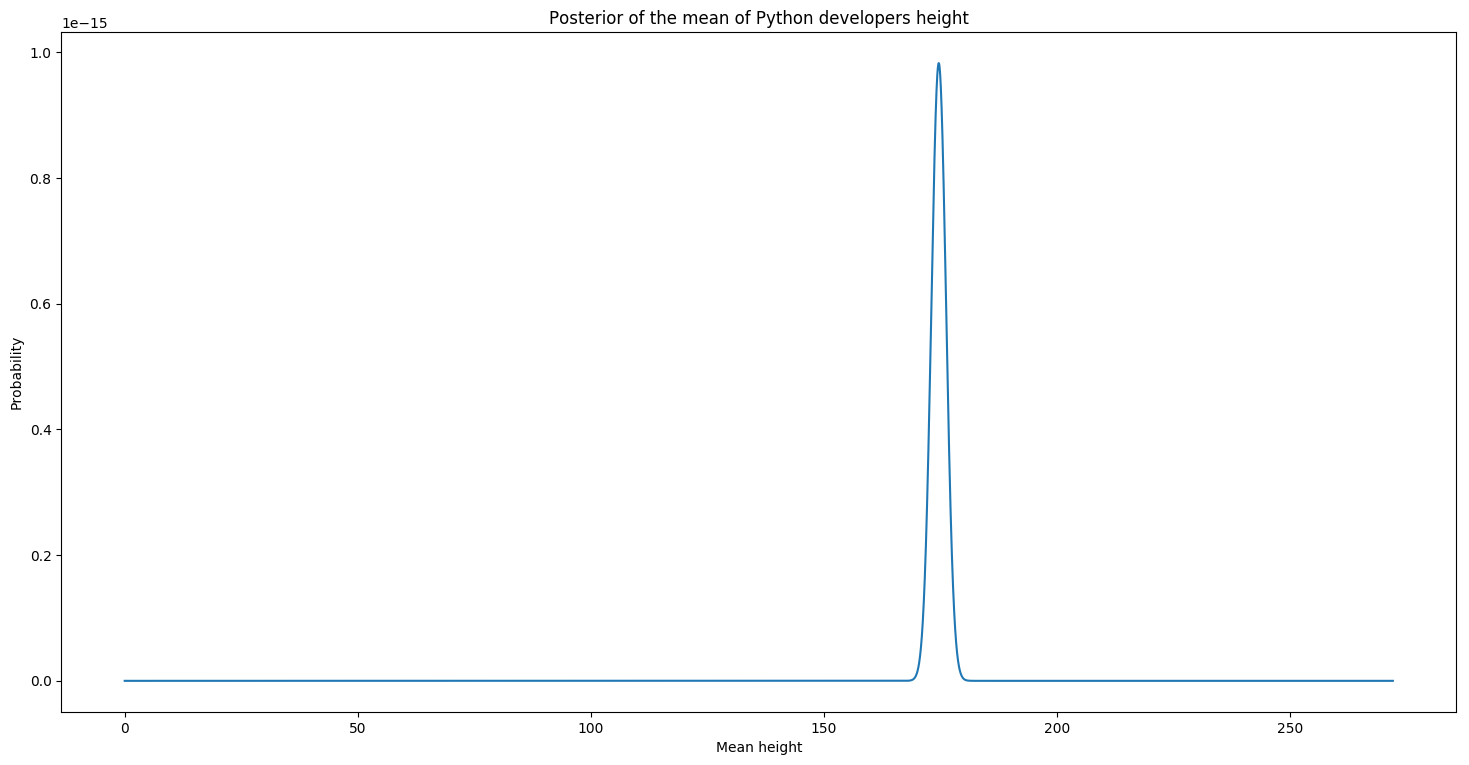

In [14]:
import numpy
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

world_height_mean = 165
world_height_standard_deviation = 7

mu_candidates = numpy.linspace(0., 272, 10_000)
sigma = 5.

mu_prior = scipy.stats.norm.logpdf(x[0], world_height_mean, world_height_standard_deviation * 2)

def compute_posteriors(x, prior, mu_candidates, sigma):
    posteriors = []
    for mu in mu_candidates:
        posterior = prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()
        posteriors.append(posterior)
    return posteriors

%time posteriors = compute_posteriors(x, prior, mu_candidates, sigma)

pyplot.plot(mu_candidates, numpy.exp(posteriors))
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Posterior of the mean of Python developers height');

As we can see, given the *prior* we defined, and the data $x$ we observed, we can see that the mean of the height of Python programmers should be between 170 and 180 cms.

Note that the distribution we observe is NOT the distribution of the height of Python programmers. It's the distribution of its mean. So, it is telling us what we know about the mean, but we ignored the standard deviation from the problem.

So, this is not yet our final solution, because we made two simplifications:
* We assumed the standard deviation was known, and we didn't compute its posterior.
* We defined a discrete number of mean heights we wanted to compute the posterior for.

So, the final solution should consider a continuous and infinite number of possible height means, and for each of them also compute the posterior of a continuous and infinite number of possible standard deviations.

Even if we just consider a limited values of both, the number of combinations of parameters becomes huge, when the number of parameters increase.

So, grid-based methods are great when the number of possible parameters is small, but it's not feasible when the number of parameters and their values grow.

### MCMC

Markov Chain Monte Carlo (MCMC) is a sampling method that instead of exploring all possible combinations of parameters, explore a feasible number of them, by considering how good he combinations already explored are.

The details of how it works are omitted, but this would be the implementation of the previous problem in PyMC3, using NUTS, one of the available algorithms.

100%|██████████| 10500/10500 [00:07<00:00, 1461.24it/s]


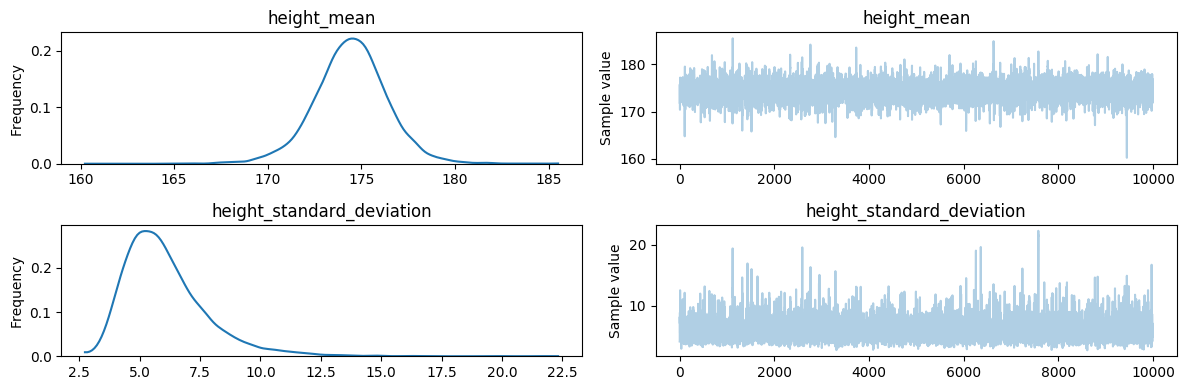

In [15]:
import pymc3

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

world_height_mean = 165
world_height_standard_deviation = 7

with pymc3.Model() as model:
    height_mean = pymc3.Normal('height_mean', world_height_mean, world_height_standard_deviation * 2)
    height_standard_deviation = pymc3.Uniform('height_standard_deviation', 0., world_height_standard_deviation * 5)
    python_programmers_height = pymc3.Normal('python_programmers_height',
                                             height_mean,
                                             height_standard_deviation,
                                             observed=x)

    traces = pymc3.sample(10_000, step=pymc3.NUTS())

pymc3.traceplot(traces);

As we can see, even if MCMC does not sample all possible combination of parameters, it is able to return the probability distributions of the mean of the height of Python programmers, and the standard deviation.

We can see how with the amount of data provided (just 10 samples), there is a lot of uncertainty on both. But if we obtain more samples, the distributions will narrow, and we'll get closer plausible results.